In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("data/train-data.csv", index_col=0)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
train.shape

(6019, 13)

In [4]:
test = pd.read_csv("data/test-data.csv", index_col=0)
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
test.shape

(1234, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [7]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
train.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [9]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [10]:
test.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [11]:
train.drop(labels='New_Price',axis=1,inplace=True)
test.drop(labels='New_Price',axis=1,inplace=True)

In [12]:
print(train['Mileage'].value_counts())

18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
27.28 kmpl      1
14.57 kmpl      1
22.8 km/kg      1
8.0 kmpl        1
17.24 kmpl      1
Name: Mileage, Length: 442, dtype: int64


In [13]:
train['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
2999 CC      1
2147 CC      1
2495 CC      1
3200 CC      1
1797 CC      1
Name: Engine, Length: 146, dtype: int64

In [14]:
train['Power'].value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
76.9 bhp        1
201 bhp         1
199.3 bhp       1
95 bhp          1
181.04 bhp      1
Name: Power, Length: 372, dtype: int64

In [15]:
train['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [16]:
train['Engine'].fillna('1197 CC',inplace=True)
train['Mileage'].fillna('17.0 kmpl',inplace=True)
train['Power'].fillna('74 bhp',inplace=True)
train['Seats'].fillna('5.0',inplace=True)
test['Engine'].fillna('1197 CC',inplace=True)
test['Power'].fillna('74 bhp',inplace=True)
test['Seats'].fillna('5.0',inplace=True)

In [17]:
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [18]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 

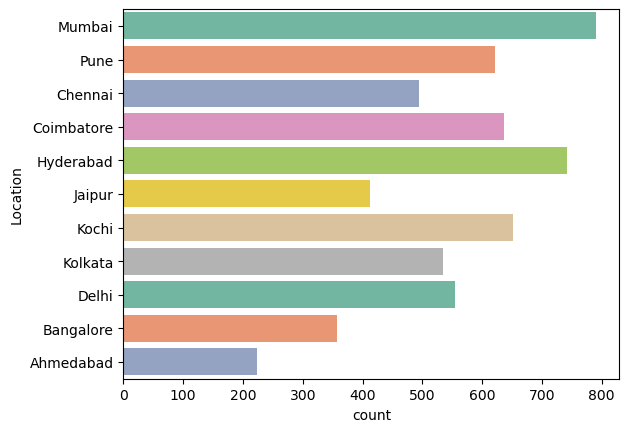

In [20]:
sns.countplot(y='Location', data=train, palette='Set2')
plt.show() 

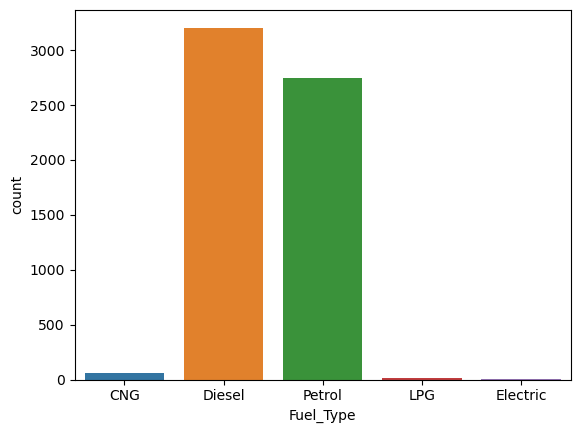

In [21]:
sns.countplot(x='Fuel_Type', data=train)
plt.show() 

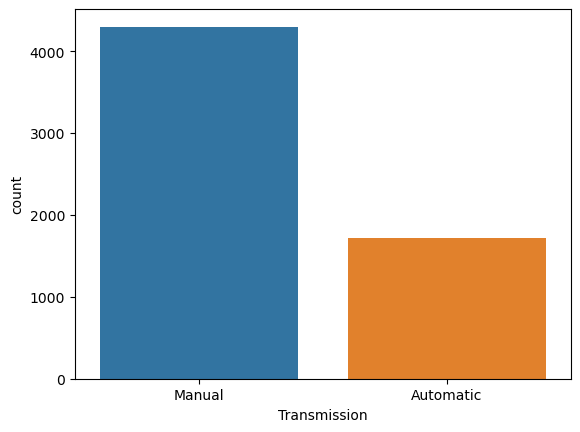

In [22]:
sns.countplot(x='Transmission', data=train)
plt.show() 

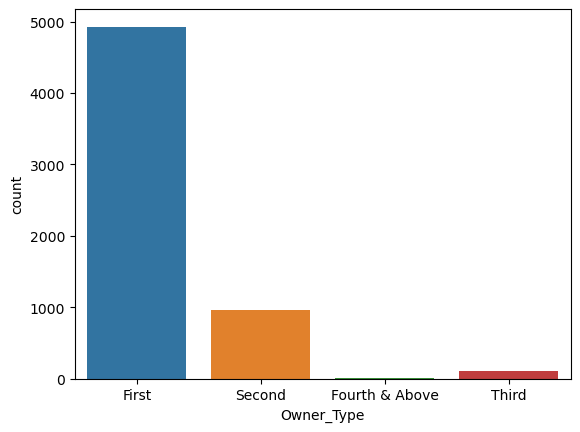

In [23]:
sns.countplot(x='Owner_Type', data=train)
plt.show()

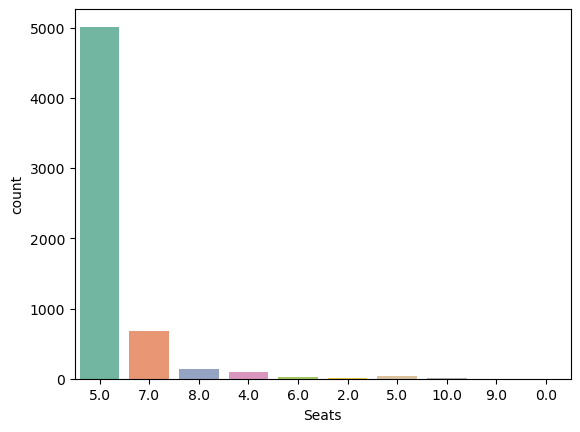

In [24]:
sns.countplot(x='Seats', data=train, palette='Set2')
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [26]:
train['Location'] = number.fit_transform(train['Location'].astype('str'))
train['Name'] = number.fit_transform(train['Name'].astype('str'))
train['Fuel_Type'] = number.fit_transform(train['Fuel_Type'].astype('str'))
train['Transmission'] = number.fit_transform(train['Transmission'].astype('str'))
train['Owner_Type'] = number.fit_transform(train['Owner_Type'].astype('str'))
train['Mileage'] = number.fit_transform(train['Mileage'].astype('str'))
train['Engine'] = number.fit_transform(train['Engine'].astype('str'))
train['Power'] = number.fit_transform(train['Power'].astype('str'))

test['Location'] = number.fit_transform(test['Location'].astype('str'))
test['Name'] = number.fit_transform(test['Name'].astype('str'))
test['Fuel_Type'] = number.fit_transform(test['Fuel_Type'].astype('str'))
test['Transmission'] = number.fit_transform(test['Transmission'].astype('str'))
test['Owner_Type'] = number.fit_transform(test['Owner_Type'].astype('str'))
test['Mileage'] = number.fit_transform(test['Mileage'].astype('str'))
test['Engine'] = number.fit_transform(test['Engine'].astype('str'))
test['Power'] = number.fit_transform(test['Power'].astype('str'))

<AxesSubplot:xlabel='Location', ylabel='Price'>

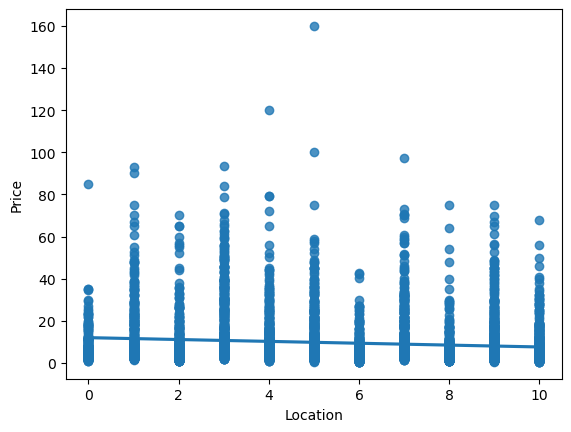

In [27]:
sns.regplot(x='Location',y='Price',data=train)  

<AxesSubplot:xlabel='Year', ylabel='Price'>

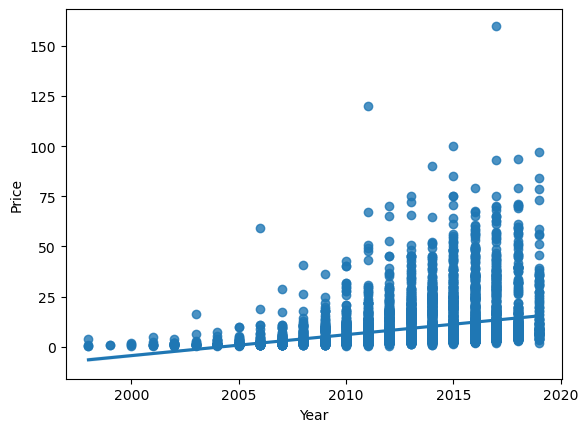

In [28]:
sns.regplot(x='Year',y='Price',data=train)  

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

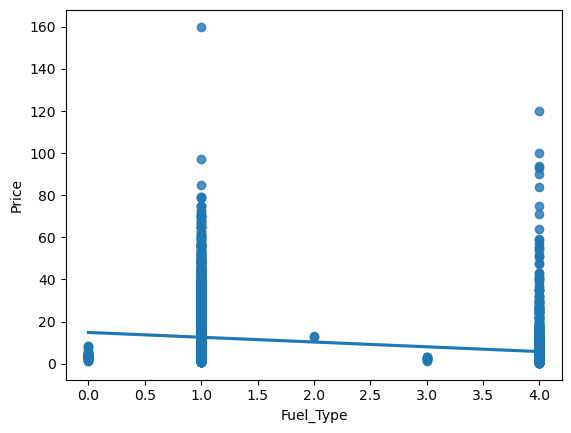

In [29]:
sns.regplot(x='Fuel_Type',y='Price',data=train)  

In [30]:
train['Seats'] = train['Seats'].astype('float')

In [31]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1200,9,2010,72000,0,1,0,403,144,260,5.0,1.75
1,512,10,2015,41000,1,1,0,275,39,56,5.0,12.50
2,486,2,2011,46000,4,1,0,232,12,344,5.0,4.50
3,1059,2,2012,87000,1,1,0,308,14,346,7.0,6.00
4,23,3,2013,40670,1,0,2,135,58,76,5.0,17.74


In [32]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [33]:
X = train[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']]
y = train.Price

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=5)

# Model Building 

**1. Random Forest**

In [35]:
from sklearn.ensemble import RandomForestRegressor 

In [36]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 1,
              'n_estimators':100,       #accuracy is almost same for 300 
              'min_samples_split': 2,
              'max_features': 'sqrt',
              'max_depth': 15}

rf = RandomForestRegressor(**parameters)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, rf_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 3.92


In [38]:
import pickle
pickle.dump(rf, open("car_rf.pkl", "wb"))

**2. XGBoost**

In [39]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(objective='reg:squarederror')
xgbr.fit(X_train, y_train)
 
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 3.98


**3. SVM**

In [40]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
mse = mean_squared_error(y_test, svm_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 11.37


# Prediction

In [41]:
predict = test
predictors =['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']
pred = rf.predict(test[predictors])

In [42]:
sub=pd.DataFrame()
sub['Price'] = np.round(pred,2)
sub.head()

,Price
0,14.27
1,8.36
2,15.88
3,3.11
4,8.68


In [42]:
sub = pd.read_csv('submission.csv',header=None)